In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
city_data = "Resources/city_data.csv"
ride_data = "Resources/ride_data.csv"

In [3]:
city_data = pd.read_csv("Resources/city_data.csv")
ride_data = pd.read_csv("Resources/ride_data.csv")
city_data.shape

(120, 3)

In [4]:

combined_data = pd.merge(ride_data, city_data, on="city", how="left")
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


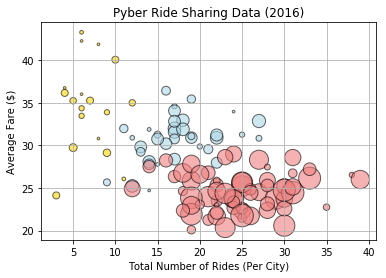

In [6]:
grouped_data =combined_data.groupby(['type','city'])
ride_count = grouped_data['city'].value_counts()
city_fare = grouped_data['fare'].mean()
driver_count= grouped_data['driver_count'].mean()
bubble_colors = pd.DataFrame({ "type": ["Rural", "Suburban","Urban"],
                                "color": ["gold","lightblue","lightcoral"]})
driver_count_df = pd.DataFrame({"driver count" : driver_count})
driver_count_df = pd.merge(driver_count_df, bubble_colors, on='type', how='left')
plt.scatter(ride_count,city_fare, s=driver_count_df['driver count']*7, c=driver_count_df['color'], edgecolors= 'k', alpha=0.6)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
plt.show()

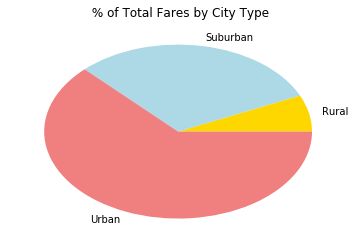

In [5]:
# Total Fare by city type
grouped_type = combined_data.groupby('type')
total_fare = grouped_type['fare'].sum()
percent_fare = round(total_fare*100/total_fare.sum(), 1)
labels = percent_fare.index
colors =["gold", "lightblue","lightcoral"]
explode= (0, 0, 0)
plt.pie(percent_fare, labels=labels, colors= colors, explode = explode )
plt.title(" % of Total Fares by City Type")
plt.show()

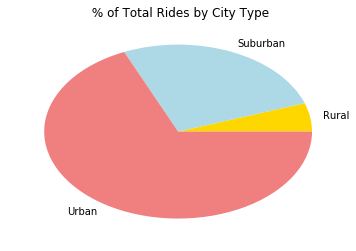

In [6]:
total_ride = grouped_type['type'].count()
percent_ride = round(total_ride*100/total_ride.sum(), 1)
plt.pie(percent_ride, labels=labels, colors= colors, explode = explode )
plt.title(" % of Total Rides by City Type")
plt.show()

